This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [ ]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [2]:
import pandas as pd

df = pd.read_csv("C:/Users/Vanesa/Downloads/data_000637.txt")
df1= df[0:10001]
print(df1)

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0         1     0          123  3869200167        2374        26
1         1     0          124  3869200167        2374        27
2         1     0           63  3869200167        2553        28
3         1     0           64  3869200167        2558        19
4         1     0           64  3869200167        2760        25
...     ...   ...          ...         ...         ...       ...
9996      1     0           60  3869200267         701         5
9997      1     0           59  3869200267         707        23
9998      1     0           63  3869200267         706        15
9999      1     0           49  3869200267         777        13
10000     1     0           50  3869200267         776        22

[10001 rows x 6 columns]


2\. Estimate the number of BX in a ORBIT (the value 'x').

In [3]:
x=3869200167
column1= df['BX_COUNTER']
max_value= column1.max()
print(max_value)
nr_BX= max_value+1

3563


3\. Find out the duration of the data taking in hours, minutes and seconds. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading the whole dataset.

In [4]:
import datetime as datetime
c1= df['TDC_MEAS']
c2= df['BX_COUNTER']
c3= df['ORBIT_CNT']
s1=c1.sum()
s2= c2.sum() + s1*30
s3= c3.sum() + s2*3563
hours=s3//(1000000000*3600)
minutes= (s3-(hours*3600*1000000000))//(60*1000000000)
seconds= (s3-(hours*3600*1000000000)-(minutes*60*1000000000))//1000000000

print(hours,minutes, seconds)

1411 33 50


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition.

In [10]:

df['Abs time'] = pd.Series(s3, index=df.index)
print(df)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0           1     0          123  3869200167        2374        26   
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
3           1     0           64  3869200167        2558        19   
4           1     0           64  3869200167        2760        25   
...       ...   ...          ...         ...         ...       ...   
1310715     1     0           62  3869211171         762        14   
1310716     1     1            4  3869211171         763        11   
1310717     1     0           64  3869211171         764         0   
1310718     1     0          139  3869211171         769         0   
1310719     1     0           61  3869211171         762        18   

                 Abs time  
0        5081630475520693  
1        5081630475520693  
2        5081630475520693  
3        5081630475520693  
4        5081630475

5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [12]:
g1=df.groupby("TDC_CHANNEL")["ORBIT_CNT"].count()
print (g1.keys())
print(g1.sort_values(ascending=False, axis=0)[0:3])

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            124, 125, 126, 127, 128, 129, 130, 137, 138, 139],
           dtype='int64', name='TDC_CHANNEL', length=133)
TDC_CHANNEL
139    108059
64      66020
63      64642
Name: ORBIT_CNT, dtype: int64


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit). Count also the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [13]:
g1=df.groupby("ORBIT_CNT")["ORBIT_CNT"].count()
print(g1)
print(g1.count())

h=df[df['TDC_CHANNEL'] == 139]
g2=h.groupby("ORBIT_CNT")["ORBIT_CNT"].count()
print(g2.count())

ORBIT_CNT
3869200167     43
3869200168     85
3869200169    127
3869200170     98
3869200171    109
             ... 
3869211167    208
3869211168    109
3869211169    191
3869211170    137
3869211171     22
Name: ORBIT_CNT, Length: 11001, dtype: int64
11001
10976


7\. **Optional:** Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

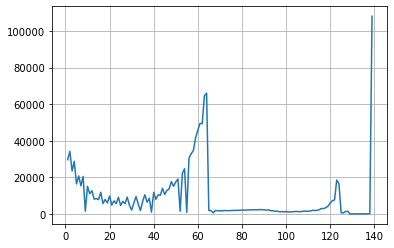

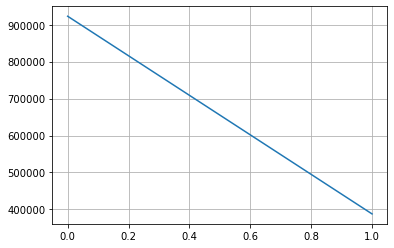

In [16]:
#1. 
import matplotlib.pyplot  as p
g1=df.groupby("TDC_CHANNEL")["ORBIT_CNT"].count()

x1=g1.keys()


y1=[]
for i in x1:
    y1.append(g1[i])    
p.plot(x1,y1)
p.grid()
p.show()


#2.
g2=df.groupby("FPGA")["ORBIT_CNT"].count()

x2=g2.keys()


y2=[]
for i in x2:
    y2.append(g2[i])    
p.plot(x2,y2)
p.grid()
p.show()